🔹 CELL 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


🔹 CELL 2: Load Dataset

In [2]:
df = pd.read_csv('/content/adult.csv')
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


🔹 CELL 3: Dataset Inspection

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.shape


(48842, 15)

In [5]:
df.isnull().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


🔹 CELL 4: Identify Categorical & Numerical Features

In [6]:
categorical_features = df.select_dtypes(include='object').columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Features:")
print(categorical_features)

print("\nNumerical Features:")
print(numerical_features)


Categorical Features:
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

Numerical Features:
Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


🔹 CELL 5: Label Encoding (Where Order Exists)

In [7]:
label_encoder = LabelEncoder()
df['income'] = label_encoder.fit_transform(df['income'])

df['income'].value_counts()


,count
income,
0,37155
1,11687


🔹 CELL 6: One-Hot Encoding (Where No Order Exists)

In [8]:
df_encoded = pd.get_dummies(
    df,
    columns=categorical_features.drop('income'),
    drop_first=True
)

df_encoded.head()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,0,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,0,0,40,1,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,7688,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,30,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


🔹 CELL 7: Split Features & Target

In [9]:
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']


🔹 CELL 8: Train–Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


🔹 CELL 9: Feature Scaling using StandardScaler

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


🔹 CELL 10: Compare Before vs After Scaling

🔸 Before Scaling

In [12]:
X_train.describe().head()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,39073.000000,39073.000000,39073.000000,39073.000000,39073.000000,39073.000000
mean,38.622297,189638.299184,10.076728,1073.395337,89.246897,40.428173
std,13.723791,105404.865484,2.571699,7430.705849,406.179060,12.457886
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,117634.000000,9.000000,0.000000,0.000000,40.000000


🔸 After Scaling

In [13]:
pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns
).describe().head()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
count,3.907300e+04,3.907300e+04,3.907300e+04,3.907300e+04,3.907300e+04,3.907300e+04,3.907300e+04,3.907300e+04,3.907300e+04,3.907300e+04,...,3.907300e+04,3.907300e+04,3.907300e+04,3.907300e+04,3.907300e+04,3.907300e+04,3.907300e+04,3.907300e+04,3.907300e+04,3.907300e+04
mean,-1.382060e-16,1.018360e-17,-2.655011e-16,3.491521e-17,4.764472e-17,-7.455852e-18,-3.909776e-17,6.837562e-17,-4.000701e-18,-7.492222e-17,...,3.909776e-18,1.263858e-17,-7.274002e-18,-9.819903e-18,1.800316e-17,1.891241e-17,6.910302e-18,1.687569e-16,-2.436791e-17,1.818501e-18
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,...,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-1.575554e+00,-1.682613e+00,-3.529513e+00,-1.444559e-01,-2.197258e-01,-3.164957e+00,-1.737492e-01,-2.613948e-01,-1.517864e-02,-1.506464e+00,...,-3.685482e-02,-6.124222e-02,-2.146831e-02,-4.778062e-02,-3.579519e-02,-2.580434e-02,-2.263017e-02,-2.964427e+00,-4.206007e-02,-2.086318e-02
25%,-7.740159e-01,-6.831300e-01,-4.186890e-01,-1.444559e-01,-2.197258e-01,-3.437007e-02,-1.737492e-01,-2.613948e-01,-1.517864e-02,-1.506464e+00,...,-3.685482e-02,-6.124222e-02,-2.146831e-02,-4.778062e-02,-3.579519e-02,-2.580434e-02,-2.263017e-02,3.373334e-01,-4.206007e-02,-2.086318e-02


🔹 CELL 11: Visualization

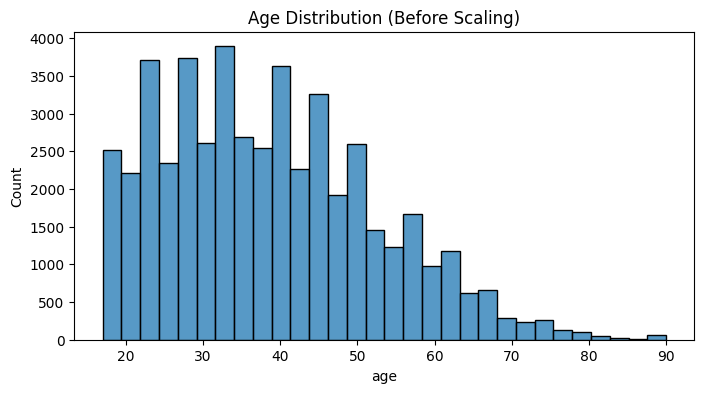

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(df['age'], bins=30)
plt.title("Age Distribution (Before Scaling)")
plt.show()


🔹 CELL 12: Save Processed Dataset

In [15]:
processed_df = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns
)

processed_df['income'] = y_train.values

processed_df.to_csv('adult_income_processed.csv', index=False)
